# Report the Annual Profit for each product

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('toys.csv')
df.head()

,Quarter,Product,Expenditure,Revenue
0,Q1,Board,274846,338768
1,Q1,Outdoor,278236,282378
2,Q1,Wooden,264788,268292
3,Q2,Board,345234,387362
4,Q2,Legos,383764,453534


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set()

In [5]:
df_pvt = ( df
         .drop(columns=['Quarter'])
         .pivot_table(index="Product",
                     aggfunc="sum")
        )
df_pvt

,Expenditure,Revenue
Product,,
Board,1442076,1604674
Legos,1371630,1531116
Outdoor,1219130,1324558
Puzzles,676850,738422
Wooden,1022992,1072866


## Calculate Annual Profit

In [6]:
df_pvt.loc[:, 'Profit'] = df_pvt.Revenue - df_pvt.Expenditure
df_pvt

,Expenditure,Revenue,Profit
Product,,,
Board,1442076,1604674,162598
Legos,1371630,1531116,159486
Outdoor,1219130,1324558,105428
Puzzles,676850,738422,61572
Wooden,1022992,1072866,49874


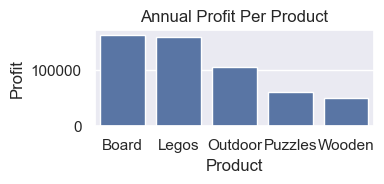

In [7]:
fig, ax = plt.subplots(figsize=(4, 2))

ax = sns.barplot(
        data = (df_pvt
               .reset_index()
               # .sort_values('Revenue')
               ),
        x = "Product",
        y = "Profit",
        ax = ax
    );

plt.title("Annual Profit Per Product");
plt.tight_layout()
plt.savefig('annual_report.png')

## Export the Profit table and grpah into Excel file

In [8]:
excel_filename = "Annual_Report.xlsx"
worksheet_name = "2014"

In [9]:
from io import BytesIO

image_data = BytesIO()
ax.figure.savefig(image_data)

In [10]:
with pd.ExcelWriter(excel_filename, engine="xlsxwriter") as FH:
    df_pvt.to_excel(FH, sheet_name = worksheet_name)
    shobj = FH.sheets[worksheet_name]
    shobj.insert_image('F4', '' , {'image_data': image_data})